## Loading data and observation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
data = pd.read_csv('../../data/raw/whreport.csv')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
ProfileReport(data).to_notebook_iframe()

## Cleaning the Processing data


In [3]:
# selecting the records from 2008 to 2018

process1=data[(data.year >=2008) & (data.year <=2018)]

#inspired by Robvh from stackoverflow
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [4]:
#remove the column that will not be use
process2 = process1.drop(['Life Ladder', 'Log GDP per capita','Social support','Generosity','Perceptions of corruption','Positive affect', 'Negative affect'],axis=1) 

#rename the column 
process3= process2.rename(columns={'Healthy life expectancy at birth':'life_expectancy','Freedom to make life choices':'Freedom_life_choices_in_percentage'})


#convet column Freedom_life_choices_in_percentage to the percentage
process4=process3.assign(Freedom_life_choices_in_percentage=lambda x: x['Freedom_life_choices_in_percentage']*100)

In [5]:
# filling the missing data with the mean base on each area from 2008 to 2018

# one way
process4.groupby('Country name')['life_expectancy'].apply(lambda x:x.fillna(x.mean()))
process4.groupby('Country name')['Freedom_life_choices_in_percentage'].apply(lambda x:x.fillna(x.mean()))
process4.head()
 
#another ways do it 
#process4['life_expectancy']=process4['life_expectancy'].fillna(process4.groupby('Country name')['life_expectancy'].transform('mean'))
#process4['Freedom_life_choices_in_percentage']=process4['Freedom_life_choices_in_percentage'].fillna(process4.groupby('Country name')['Freedom_life_choices_in_percentage'].transform('mean'))


# df['value1']=df.groupby('name')['value'].apply(lambda x:x.fillna(x.mean()))
# inspired from Ashish Anand from stack over flow
#https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

,Country name,year,life_expectancy,Freedom_life_choices_in_percentage
0,Afghanistan,2008,50.80,71.8
1,Afghanistan,2009,51.20,67.9
2,Afghanistan,2010,51.60,60.0
3,Afghanistan,2011,51.92,49.6
4,Afghanistan,2012,52.24,53.1


In [6]:
# delete the palce do not have any records 
process5=process4.dropna()

# making sure the observeration are more accurate, only keeping the country have the valid record each year from 2008 to 2018
process6=process5.groupby('Country name').filter(lambda x : len(x)>10)
process6

#inspire by BENY from stack over flow
#https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

#export data
process6.to_csv('../../data/processed/gabrielcha_data.csv',index=None)
process6

,Country name,year,life_expectancy,Freedom_life_choices_in_percentage
0,Afghanistan,2008,50.80,71.8
1,Afghanistan,2009,51.20,67.9
2,Afghanistan,2010,51.60,60.0
3,Afghanistan,2011,51.92,49.6
4,Afghanistan,2012,52.24,53.1
...,...,...,...,...
1942,Zimbabwe,2014,52.38,64.2
1943,Zimbabwe,2015,53.80,66.7
1944,Zimbabwe,2016,54.40,73.3
1945,Zimbabwe,2017,55.00,75.3


### Method chaining now move to project_function py
- [gabrielcha function] https://github.com/data301-2021-summer2/group09-project/blob/7401be865d9c27637492f099667e5b9361afccae/analysis/Gabrielcha/project_functions.py

## Exploratory Data Analysis (EDA)
### My research question 
### What is the relationship between the country which has the highest average life expectancy at birth from 2008 to 2018 and hightest freedom to make life choices?

In [7]:
sns.set_theme(style="ticks",
              font_scale=1.3 )

In [9]:
process6.nunique(axis=0)

Country name                           64
year                                   11
life_expectancy                       476
Freedom_life_choices_in_percentage    383
dtype: int64

In [10]:
process6.describe()

,year,life_expectancy,Freedom_life_choices_in_percentage
count,704.000000,704.000000,704.000000
mean,2013.000000,63.577642,73.948722
std,3.164526,6.975356,13.420930
min,2008.000000,44.140000,33.500000
25%,2010.000000,59.775000,64.275000
50%,2013.000000,64.900000,75.700000
75%,2016.000000,68.500000,84.525000
max,2018.000000,75.000000,97.000000


In [12]:
#looking for which country have a higher average of lift expetancy and freedom of choice
graph1=process6.groupby('Country name',sort=True)['life_expectancy'].mean().sort_values(ascending=False).reset_index() 
graph2=process6.groupby('Country name',sort=True)['Freedom_life_choices_in_percentage'].mean().sort_values(ascending=False).reset_index()

In [13]:
graph1

,Country name,life_expectancy
0,Japan,74.312727
1,Spain,73.314545
2,Italy,72.969091
3,France,72.805455
4,Canada,72.696364
...,...,...
59,Niger,50.883636
60,Zimbabwe,50.550909
61,Cameroon,49.669091
62,Mali,49.485455


In [14]:
graph2

,Country name,Freedom_life_choices_in_percentage
0,Cambodia,94.445455
1,Denmark,94.290909
2,Canada,93.027273
3,Sweden,92.518182
4,Costa Rica,91.063636
...,...,...
59,Armenia,53.845455
60,Ukraine,53.381818
61,Chad,53.227273
62,Afghanistan,52.945455


In [15]:
combin=pd.merge(graph1, graph2, how='outer' ,on=['Country name'])
combin

,Country name,life_expectancy,Freedom_life_choices_in_percentage
0,Japan,74.312727,79.909091
1,Spain,73.314545,76.618182
2,Italy,72.969091,61.136364
3,France,72.805455,83.272727
4,Canada,72.696364,93.027273
...,...,...,...
59,Niger,50.883636,75.254545
60,Zimbabwe,50.550909,60.518182
61,Cameroon,49.669091,75.718182
62,Mali,49.485455,68.563636


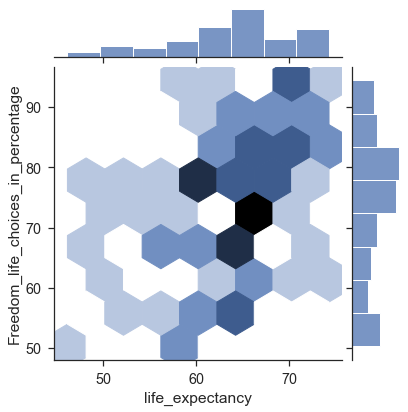

In [142]:
ax1=sns.jointplot(data=combin, x="life_expectancy", y="Freedom_life_choices_in_percentage", kind="hex")

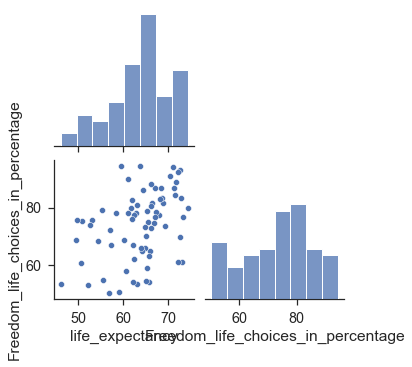

In [143]:
ax2=sns.pairplot(combin, vars= ["life_expectancy", "Freedom_life_choices_in_percentage"],corner=True)

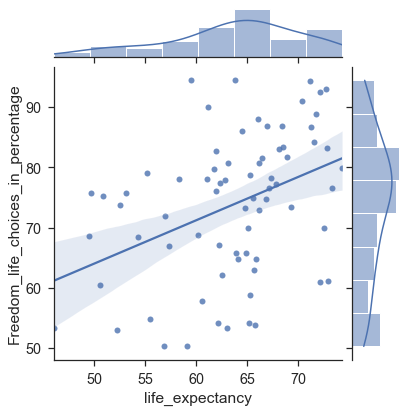

In [144]:
sns.jointplot( x="life_expectancy", y="Freedom_life_choices_in_percentage", data=combin, kind='reg')

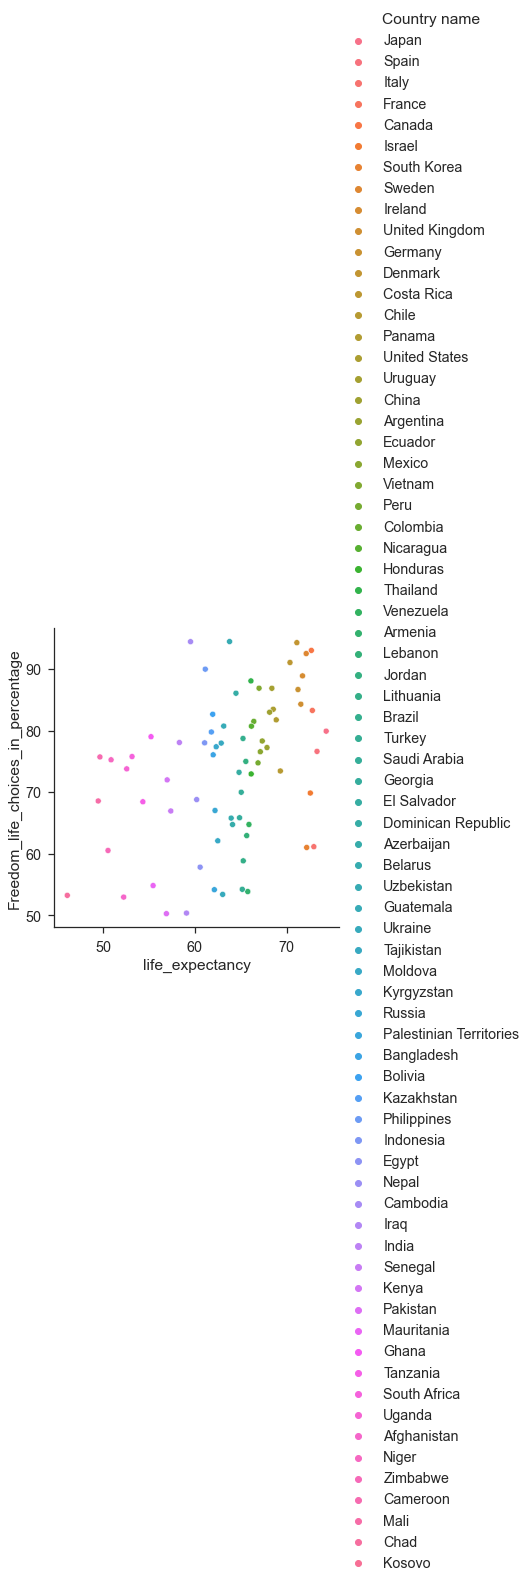

In [146]:
sns.relplot(x="life_expectancy", y="Freedom_life_choices_in_percentage", hue="Country name", data=combin);